In [1]:
import trackml
from trackml.dataset import load_event
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
hits, cells, particles, truth = load_event('../train_1/event000001000')

In [3]:
final = pd.merge(hits, cells)
final = pd.merge(final, truth)
final = pd.merge(final, particles)

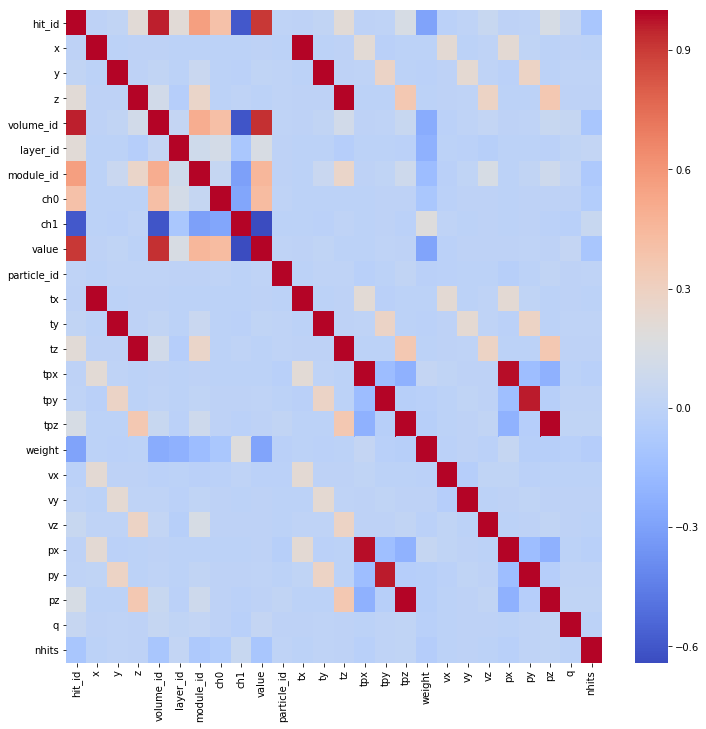

In [4]:
figure = plt.figure(figsize=(12,12))
sns.heatmap(final.corr(), cmap='coolwarm')

#### tx, ty, tz have high correlation with x, y, z. This has to be true since where the particle is later will depend on its intial position

In [5]:
hits.head()

,hit_id,x,y,z,volume_id,layer_id,module_id
0,1,-64.409897,-7.163700,-1502.5,7,2,1
1,2,-55.336102,0.635342,-1502.5,7,2,1
2,3,-83.830498,-1.143010,-1502.5,7,2,1
3,4,-96.109100,-8.241030,-1502.5,7,2,1
4,5,-62.673599,-9.371200,-1502.5,7,2,1


In [6]:
cells.head()

,hit_id,ch0,ch1,value
0,1,209,617,0.013832
1,1,210,617,0.079887
2,1,209,618,0.211723
3,2,68,446,0.334087
4,3,58,954,0.034005


In [7]:
particles.head()

,particle_id,vx,vy,vz,px,py,pz,q,nhits
0,4503668346847232,-0.009288,0.009861,-0.077879,-0.055269,0.323272,-0.203492,-1,8
1,4503737066323968,-0.009288,0.009861,-0.077879,-0.948125,0.470892,2.010060,1,11
2,4503805785800704,-0.009288,0.009861,-0.077879,-0.886484,0.105749,0.683881,-1,0
3,4503874505277440,-0.009288,0.009861,-0.077879,0.257539,-0.676718,0.991616,1,12
4,4503943224754176,-0.009288,0.009861,-0.077879,16.439400,-15.548900,-39.824902,1,3


In [9]:
truth.head()

,hit_id,particle_id,tx,ty,tz,tpx,tpy,tpz,weight
0,1,0,-64.411598,-7.164120,-1502.5,250710.000000,-149908.000000,-956385.00000,0.000000
1,2,22525763437723648,-55.338501,0.630805,-1502.5,-0.570605,0.028390,-15.49220,0.000010
2,3,0,-83.828003,-1.145580,-1502.5,626295.000000,-169767.000000,-760877.00000,0.000000
3,4,297237712845406208,-96.122902,-8.230360,-1502.5,-0.225235,-0.050968,-3.70232,0.000008
4,5,418835796137607168,-62.659401,-9.375040,-1502.5,-0.281806,-0.023487,-6.57318,0.000009


In [10]:
# Defining some cylindrical coordinates
final['r'] = np.sqrt(final['x']*final['x'] + final['y']*final['y'])
hits['r'] = np.sqrt(hits['x']*hits['x'] + hits['y']*hits['y'])

final['phi'] = np.arctan2(final['x'], final['y'])
hits['phi'] = np.arctan2(hits['x'], hits['y'])

final['theta'] = np.arctan2(final['z'], final['r'])
hits['theta'] = np.arctan2(hits['z'], hits['r'])

x = hits.x.values
y = hits.y.values
z = hits.z.values

r = np.sqrt(x**2 + y**2 + z**2)
hits['x2'] = x/r
hits['y2'] = y/r

r = np.sqrt(x**2 + y**2)
hits['z2'] = z/r

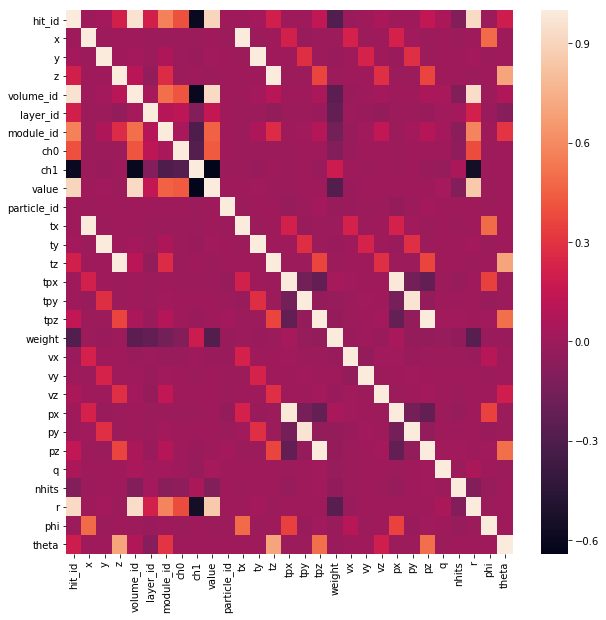

In [11]:
figure = plt.figure(figsize=(10,10))
sns.heatmap(final.corr())

In [73]:
sample_particle = final[final['particle_id']==297237712845406208]

In [18]:
hit_cells = cells.groupby(['hit_id']).value.count().values

In [21]:
hit_value = cells.groupby(['hit_id']).value.sum().values

In [24]:
cells

,hit_id,ch0,ch1,value
0,1,209,617,0.013832
1,1,210,617,0.079887
2,1,209,618,0.211723
3,2,68,446,0.334087
4,3,58,954,0.034005
5,3,58,956,0.007798
6,3,60,951,0.019897
7,3,58,955,0.099964
8,3,59,952,0.065576
9,3,60,952,0.018697


Text(0,0.5,'r')

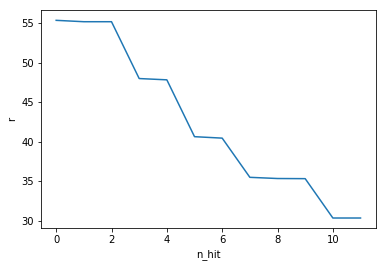

In [13]:
plt.plot(np.arange(len(sample_particle['r'])), sample_particle['r'])
plt.xlabel('n_hit')
plt.ylabel('r')

Text(0,0.5,'phi')

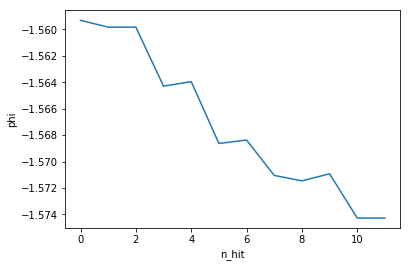

In [14]:
plt.plot(np.arange(len(sample_particle['phi'])), sample_particle['phi'])
plt.xlabel('n_hit')
plt.ylabel('phi')

Text(0,0.5,'theta')

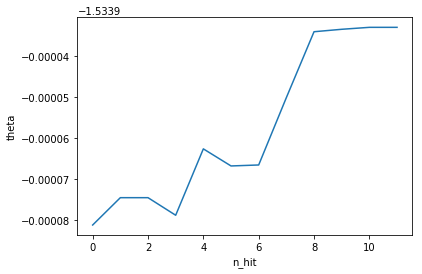

In [15]:
plt.plot(np.arange(len(sample_particle['theta'])), sample_particle['theta'])
plt.xlabel('n_hit')
plt.ylabel('theta')

Text(0,0.5,'z')

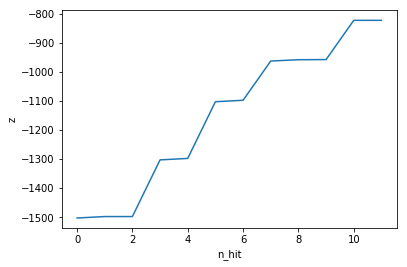

In [16]:
plt.plot(np.arange(len(sample_particle['z'])), sample_particle['z'])
plt.xlabel('n_hit')
plt.ylabel('z')

In [30]:
sample_particle

,hit_id,x,y,z,volume_id,layer_id,module_id,ch0,ch1,value,...,vy,vz,px,py,pz,q,nhits,r,phi,theta
0,2,-55.336102,0.635342,-1502.5,7,2,1,68,446,0.334087,...,0.006381,1.16279,-0.56967,-0.011187,-15.496,1,10,55.339748,-1.559315,-1.533981
1,1420,-55.162201,0.604841,-1497.5,7,2,106,242,444,0.117364,...,0.006381,1.16279,-0.56967,-0.011187,-15.496,1,10,55.165516,-1.559832,-1.533975
2,1420,-55.162201,0.604841,-1497.5,7,2,106,242,445,0.216680,...,0.006381,1.16279,-0.56967,-0.011187,-15.496,1,10,55.165516,-1.559832,-1.533975
3,1460,-47.975498,0.311848,-1302.5,7,4,1,86,316,0.327937,...,0.006381,1.16279,-0.56967,-0.011187,-15.496,1,10,47.976509,-1.564296,-1.533979
4,3170,-47.812302,0.327322,-1297.5,7,4,106,236,314,0.297341,...,0.006381,1.16279,-0.56967,-0.011187,-15.496,1,10,47.813423,-1.563950,-1.533963
5,3234,-40.622799,0.088046,-1102.5,7,6,1,102,186,0.257461,...,0.006381,1.16279,-0.56967,-0.011187,-15.496,1,10,40.622894,-1.568629,-1.533967
6,5343,-40.438801,0.098098,-1097.5,7,6,106,229,183,0.281778,...,0.006381,1.16279,-0.56967,-0.011187,-15.496,1,10,40.438919,-1.568370,-1.533967
7,5424,-35.480598,-0.008800,-962.5,7,8,1,112,95,0.348640,...,0.006381,1.16279,-0.56967,-0.011187,-15.496,1,10,35.480602,-1.571044,-1.533950
8,5482,-35.330101,-0.023294,-958.0,7,8,4,3,77,0.240534,...,0.006381,1.16279,-0.56967,-0.011187,-15.496,1,10,35.330109,-1.571456,-1.533934
9,7867,-35.312302,-0.004440,-957.5,7,8,106,223,92,0.304248,...,0.006381,1.16279,-0.56967,-0.011187,-15.496,1,10,35.312302,-1.570922,-1.533933


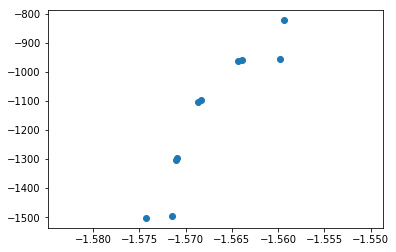

In [40]:
plt.scatter(np.unique(sample_particle['phi']), np.unique(sample_particle['z']))

### So all three of the parameters we defined change for a given helix

In [ ]:

hits['k'] = hits['r']/(np.square(hits['r']) + np.square(hits[''])

In [41]:
sample_particle['t'] = np.arccos(sample_particle['x']/sample_particle['r'])
sample_particle['c'] = sample_particle['z']/sample_particle['t']
sample_particle['constant'] = sample_particle['r']/sample_particle['c']

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [49]:
sample_particle['t_sin'] = np.arccos(sample_particle['y']/sample_particle['r'])
sample_particle['t_sin']


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


0     1.559315
1     1.559832
2     1.559832
3     1.564296
4     1.563950
5     1.568629
6     1.568370
7     1.571044
8     1.571456
9     1.570922
10    1.574267
11    1.574267
Name: t_sin, dtype: float32

In [48]:
sample_particle['t']

0     3.130110
1     3.130631
2     3.130631
3     3.135097
4     3.134739
5     3.139436
6     3.139176
7     3.141104
8     3.140902
9     3.141593
10    3.138123
11    3.138123
Name: t, dtype: float32

In [104]:
import os

import numpy as np
import pandas as pd

from trackml.dataset import load_event
from trackml.score import score_event

from sklearn import metrics
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler, MaxAbsScaler, Normalizer

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

from scipy import spatial

X = hits[['theta', 'x2', 'y2', 'z2']]
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

eps = 0.008
min_samp = 3
db = DBSCAN(eps=eps, min_samples=min_samp, metric='euclidean').fit(X)
labels = db.labels_

clustering = pd.DataFrame()
clustering['hit_id'] = truth['hit_id']
clustering['track_id'] = labels

score = score_event(truth, clustering)
print('track-ml custom metric score:', round(score, 4))

labels_true = truth['particle_id']
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

print('\nOTHER CLUSTERING RESULTS:')
print('Estimated number of clusters: %d' % n_clusters)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(labels_true, labels))
rej_perc = list(labels).count(-1) / float(hits.shape[0]) * 100
rej_perc = round(rej_perc, 2)
print ("Rejected samples %:", str(rej_perc) + '%')
rejected_count = list(labels).count(-1)
print ("Rejected samples:", rejected_count)
print ("Total samples:", hits.shape[0])
print ("Clustered samples:", hits.shape[0] - list(labels).count(-1))

track-ml custom metric score: 0.1992

OTHER CLUSTERING RESULTS:
Estimated number of clusters: 7192
Homogeneity: 0.440
Completeness: 0.850
Adjusted Rand Index: 0.051
Rejected samples %: 58.21%
Rejected samples: 70401
Total samples: 120939
Clustered samples: 50538


In [92]:
hits.theta.describe()

count    120939.000000
mean         -0.001889
std           1.145672
min          -1.547297
25%          -1.206510
50%          -0.013134
75%           1.210637
max           1.549927
Name: theta, dtype: float64

In [77]:
sample_particle['theta']

0    -1.533981
1    -1.533975
2    -1.533975
3    -1.533979
4    -1.533963
5    -1.533967
6    -1.533967
7    -1.533950
8    -1.533934
9    -1.533933
10   -1.533933
11   -1.533933
Name: theta, dtype: float32

In [78]:
sample_particle2['theta']

12   -1.506683
13   -1.506351
14   -1.506351
15   -1.505895
16   -1.505895
17   -1.505665
18   -1.505651
19   -1.505400
20   -1.505414
21   -1.505414
22   -1.505314
23   -1.505285
24   -1.505285
25   -1.505255
26   -1.505261
27   -1.505261
Name: theta, dtype: float32

In [95]:
given = pd.merge(hits, cells)

In [96]:
given

,hit_id,x,y,z,volume_id,layer_id,module_id,r,phi,theta,x2,y2,z2,ch0,ch1,value
0,1,-64.409897,-7.163700,-1502.5,7,2,1,64.807045,-1.681562,-1.527690,-0.042829,-0.004763,-23.184208,209,617,0.013832
1,1,-64.409897,-7.163700,-1502.5,7,2,1,64.807045,-1.681562,-1.527690,-0.042829,-0.004763,-23.184208,210,617,0.079887
2,1,-64.409897,-7.163700,-1502.5,7,2,1,64.807045,-1.681562,-1.527690,-0.042829,-0.004763,-23.184208,209,618,0.211723
3,2,-55.336102,0.635342,-1502.5,7,2,1,55.339748,-1.559315,-1.533981,-0.036804,0.000423,-27.150467,68,446,0.334087
4,3,-83.830498,-1.143010,-1502.5,7,2,1,83.838287,-1.584430,-1.515055,-0.055707,-0.000760,-17.921406,58,954,0.034005
5,3,-83.830498,-1.143010,-1502.5,7,2,1,83.838287,-1.584430,-1.515055,-0.055707,-0.000760,-17.921406,58,956,0.007798
6,3,-83.830498,-1.143010,-1502.5,7,2,1,83.838287,-1.584430,-1.515055,-0.055707,-0.000760,-17.921406,60,951,0.019897
7,3,-83.830498,-1.143010,-1502.5,7,2,1,83.838287,-1.584430,-1.515055,-0.055707,-0.000760,-17.921406,58,955,0.099964
8,3,-83.830498,-1.143010,-1502.5,7,2,1,83.838287,-1.584430,-1.515055,-0.055707,-0.000760,-17.921406,59,952,0.065576
9,3,-83.830498,-1.143010,-1502.5,7,2,1,83.838287,-1.584430,-1.515055,-0.055707,-0.000760,-17.921406,60,952,0.018697


In [106]:
np.unique(hits.z).size

38020

In [107]:
sample_particle

,hit_id,x,y,z,volume_id,layer_id,module_id,ch0,ch1,value,...,pz,q,nhits,r,phi,theta,t,c,constant,t_sin
0,2,-55.336102,0.635342,-1502.5,7,2,1,68,446,0.334087,...,-15.496,1,10,55.339748,-1.559315,-1.533981,3.130110,-480.015045,-0.115288,1.559315
1,1420,-55.162201,0.604841,-1497.5,7,2,106,242,444,0.117364,...,-15.496,1,10,55.165516,-1.559832,-1.533975,3.130631,-478.338104,-0.115327,1.559832
2,1420,-55.162201,0.604841,-1497.5,7,2,106,242,445,0.216680,...,-15.496,1,10,55.165516,-1.559832,-1.533975,3.130631,-478.338104,-0.115327,1.559832
3,1460,-47.975498,0.311848,-1302.5,7,4,1,86,316,0.327937,...,-15.496,1,10,47.976509,-1.564296,-1.533979,3.135097,-415.457703,-0.115479,1.564296
4,3170,-47.812302,0.327322,-1297.5,7,4,106,236,314,0.297341,...,-15.496,1,10,47.813423,-1.563950,-1.533963,3.134739,-413.910004,-0.115516,1.563950
5,3234,-40.622799,0.088046,-1102.5,7,6,1,102,186,0.257461,...,-15.496,1,10,40.622894,-1.568629,-1.533967,3.139436,-351.177673,-0.115676,1.568629
6,5343,-40.438801,0.098098,-1097.5,7,6,106,229,183,0.281778,...,-15.496,1,10,40.438919,-1.568370,-1.533967,3.139176,-349.614044,-0.115667,1.568370
7,5424,-35.480598,-0.008800,-962.5,7,8,1,112,95,0.348640,...,-15.496,1,10,35.480602,-1.571044,-1.533950,3.141104,-306.420868,-0.115790,1.571044
8,5482,-35.330101,-0.023294,-958.0,7,8,4,3,77,0.240534,...,-15.496,1,10,35.330109,-1.571456,-1.533934,3.140902,-305.007935,-0.115833,1.571456
9,7867,-35.312302,-0.004440,-957.5,7,8,106,223,92,0.304248,...,-15.496,1,10,35.312302,-1.570922,-1.533933,3.141593,-304.781738,-0.115861,1.570922
